In [2]:
import numpy as np
import pandas as pd
from pylab import plt, matplotlib as mpl

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [7]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [26]:
data = pd.read_csv('./tr_eikon_eod_data.csv')
data = pd.DataFrame(data['.SPX'])
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2138 entries, 1 to 2215
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


In [27]:
data['rets'] = np.log(data / data.shift(1))
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)

array([<Axes: >, <Axes: >], dtype=object)

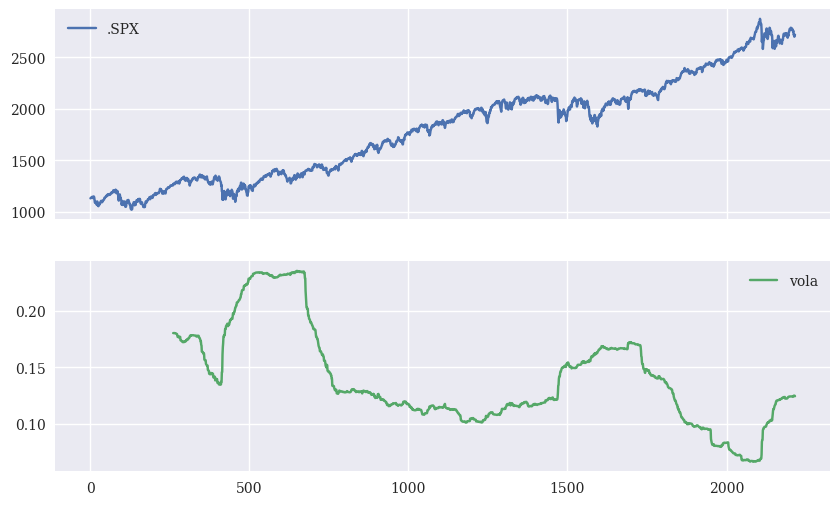

In [28]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6))